# 图像形态学处理

## 腐蚀和膨胀

腐蚀和膨胀是最基本的形态学操作，腐蚀和膨胀都是针对白色部分（高亮部分）而言的。

膨胀就是使图像中高亮部分扩张，效果图拥有比原图更大的高亮区域；腐蚀是原图中的高亮区域被蚕食，效果图拥有比原图更小的高亮区域。膨胀是求局部最大值的操作，腐蚀是求局部最小值的操作。

### 膨胀
膨胀就是求局部最大值的操作。该操作将结构元在图像上滑动，当锚点像素移动到了白色区域后，结构元中的白色区域的像素将改变为白色。因此，它会增加图像中的白色区域或增加前景对象的大小。

（下图左边为结构元，箭头指向为结构源的锚点。）

![](images/2023-08-11-18-17-51.png)

OpenCV中提供了cv.getStructuringElement()函数获得结构元，如下示例：

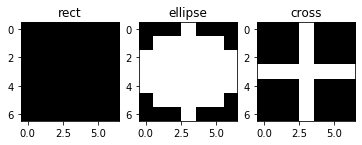

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

kernel1 = cv.getStructuringElement(cv.MORPH_RECT, (7, 7)) #矩形结构
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7)) #椭圆结构
kernel3 = cv.getStructuringElement(cv.MORPH_CROSS, (7, 7)) #十字形结构

plt.subplot(131),plt.imshow(kernel1,cmap="gray"),plt.title("rect")
plt.subplot(132),plt.imshow(kernel2,cmap="gray"),plt.title("ellipse")
plt.subplot(133),plt.imshow(kernel3,cmap="gray"),plt.title("cross")
plt.show()


OpenCV中的cv.dilate()函数实现了该操作：

![](images/2023-08-11-18-23-56.png)

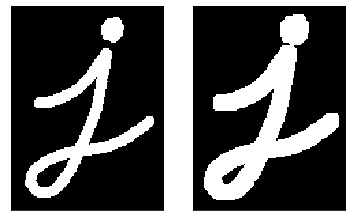

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("exp_images/j.bmp")
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)
plt.subplot(1,2,1),plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(dilation,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

## 腐蚀
腐蚀就是求局部最小值的操作。这与扩张的方向相反。每当结构化元素位于与自身相同的形状之上时，它就会单独留下该点。否则，将其中的所有像素设置为黑色。

![](images/2023-08-11-18-29-14.png)

OpenCV中的cv.erode()函数实现了该操作：

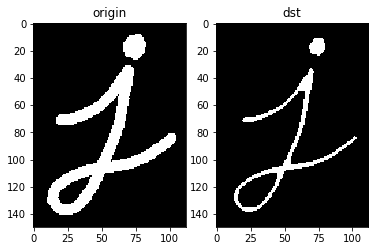

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/j.bmp")

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

erosion = cv.erode(img,kernel,iterations = 1)


plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title("origin")
plt.subplot(122),plt.imshow(erosion,cmap="gray"),plt.title("dst")
plt.show()



## 复合操作
图像形态学不仅仅关于侵蚀和扩张，这些只是完成复杂操作的基础知识。我们将侵蚀和膨胀进行运算，会得到新的图像特征输出，这些输出对我们分析图像很有帮助。在OpenCV中我们使用cv.morphologyEx()函数来完成上述形态学复合操作。

![](images/2023-08-14-10-50-43.png)

该函数提供了以下几个复合操作类型：

- cv.MORPH_ERODE = 0 ：侵蚀，与cv.erode()效果一致；
- cv.MORPH_DILATE = 1 ：膨胀，与cv.dilate()效果一致；
- cv.MORPH_OPEN = 2 ：开运算；
- cv.MORPH_CLOSE = 3 ：闭运算；
- cv.MORPH_GRADIENT = 4 ：形态梯度；
- cv.MORPH_TOPHAT = 5 ：顶帽；
- cv.MORPH_BLACKHAT = 6 ：黑帽；
- cv.MORPH_HITMISS = 7

### 开运算
图像开运算是图像依次经过腐蚀、膨胀处理后的过程。图像被腐蚀后去除了噪声，但也压缩了图像；接着对图像进行膨胀处理，可以用来去除噪声。

开运算操作数为cv.MORPH_OPEN参考下面代码：

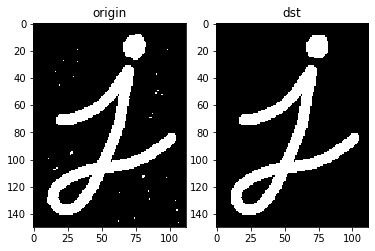

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/j_noise_out.bmp")

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

opening = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)

plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title("origin")
plt.subplot(122),plt.imshow(opening,cmap="gray"),plt.title("dst")
plt.show()

### 闭操作
图像闭运算是将图像依次经过膨胀、腐蚀处理的过程。通过膨胀可以很好的去除前景物体内部的小孔，再通过腐蚀操作恢复图像。

闭运算操作数为cv.MORPH_CLOSE,参考下面代码：

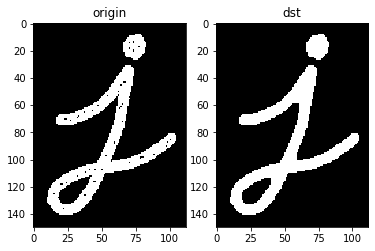

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/j_noise_in.bmp")

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

closing = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel)


plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title("origin")
plt.subplot(122),plt.imshow(closing,cmap="gray"),plt.title("dst")
plt.show()

### 形态梯度

形态梯度运算是膨胀图像减去腐蚀图像的结果，得到图像的轮廓。形态梯度操作数为cv.MORPH_GRADIENT，参考下面代码：

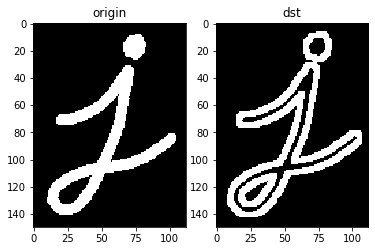

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/j.bmp")

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

gradient = cv.morphologyEx(img,cv.MORPH_GRADIENT,kernel)


plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title("origin")
plt.subplot(122),plt.imshow(gradient,cmap="gray"),plt.title("dst")
plt.show()

### 顶帽
顶帽是原图像与开运算的结果图之差。因此，顶帽运算往往用来分离比邻近点亮的一些斑点。顶帽操作数为cv.MORPH_TORHAT，参考下面代码：


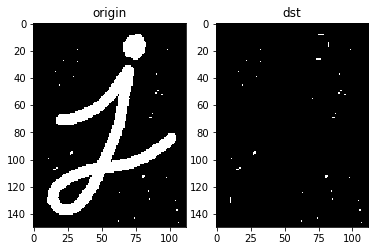

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/j_noise_out.bmp")

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

tophat = cv.morphologyEx(img,cv.MORPH_TOPHAT,kernel)


plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title("origin")
plt.subplot(122),plt.imshow(tophat,cmap="gray"),plt.title("dst")
plt.show()

### 黑帽
黑帽是闭运算结果与原图像之差。黑帽运算的效果突出了比原图轮廓区域内更暗的区域，且与选择的卷积核大小有关，所以黑帽运算用来分离比邻近点暗的一些斑块。黑帽操作数为cv.MORPH_BLACKHAT，参考下面代码：

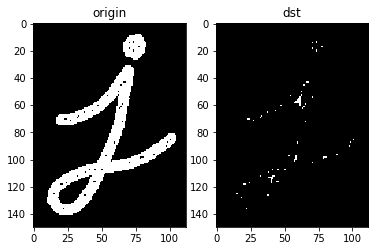

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/j_noise_in.bmp")

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

blackhat = cv.morphologyEx(img,cv.MORPH_BLACKHAT,kernel)


plt.subplot(121),plt.imshow(img,cmap="gray"),plt.title("origin")
plt.subplot(122),plt.imshow(blackhat,cmap="gray"),plt.title("dst")
plt.show()